Jacob Diaz | Timur Beletskii 

INFO 1998 Final Project 

Our dataset can be found here: https://www.kaggle.com/nycopendata/high-schools#scores.csv

We also merged it with demographic data from here: https://www.kaggle.com/goldenoakresearch/us-acs-mortgage-equity-loans-rent-statistics


Question: Is there a correlation between New York City borough and SAT score? Can we more accurately predict based on math, reading or writing score? Also, how does demographic data compare? Would demographic data be better at predicting bourough? Or do they reflect the same thing?

Hypothesis: There is a correlation between borough and average SAT score, as most elite high schools in NYC are in Manhattan. We think the reading score will be the best predicting factor, as some boroughs are primarily immigrants, which can cause a language barrier and thus lower reading scores. We also think the Manhattan borough will have the highest percent of people who took the SAT, for the reasoning above. We also think that demographic data will be better at predicting bourough, as it seems more relavent than SAT score in this sort of prediction.

In [78]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [79]:
df=pd.read_csv('scores.csv')
df_Money=pd.read_csv('real_estate_NY_YAY.csv')
df.dropna()
scoresum=df['Average Score (SAT Math)']+df['Average Score (SAT Reading)']+ df['Average Score (SAT Writing)']
df['scoresum']=scoresum
df.head()

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,...,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested,scoresum
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,...,87.0,3.4%,21.8%,67.8%,4.6%,NaN,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,...,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%,1859.0
3,02M294,Essex Street Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,358.0,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,78.9%,1193.0
4,02M308,Lower Manhattan Arts Academy,Manhattan,M445,350 Grand Street,Manhattan,NY,10002,40.71687,-73.98953,...,383.0,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,65.1%,1261.0


# Part A: Visualizations of SAT score on NYC Map 

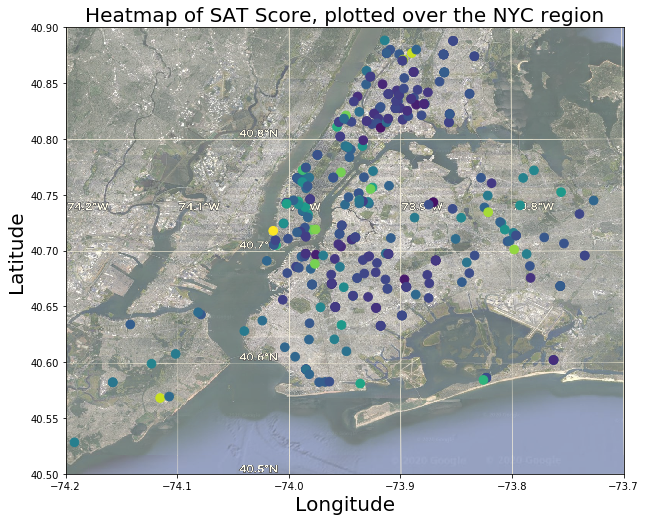

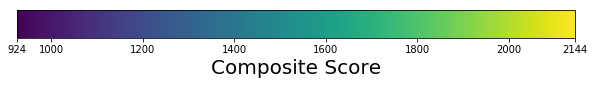

In [80]:
import matplotlib as mpl
x = df['Longitude']
y = df['Latitude']
col = df['scoresum']

plt.figure(figsize=(10.0,10.0))
plt.rc('xtick', labelsize=10) 
img = plt.imread('image001.png')
implot = plt.imshow(img, extent=[-74.2, -73.7, 40.5, 40.9], alpha=0.60)


min = 100000
max = 0
for z in col:
    if z > max:
        max = z
    if z < min: 
        min = z

plot = plt.scatter(x, y, c = col , s=75)

plt.title('Heatmap of SAT Score, plotted over the NYC region',size=20)
plt.xlabel('Longitude')
plt.ylabel('Latitude')


fig, ax = plt.subplots(figsize=(10, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=min, vmax=max)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='horizontal',ticks=[924,1000,1200,1400,1600,1800,2000,2144])
cb1.set_label('Composite Score')

plt.show() 


This is a heatmap, with each dot representing a school and their average composite SAT score. 

# Part B: Creating various KNN models using SAT score to predict bourough

We've identified the problem as a classification one, so for the SAT score part we decided to create some different KNN models as see how they perform on predicting bourough.

Creating a KNN model based on Math SAT score 

In [81]:
#Converting the city data to numerical data for KNN
enc = LabelEncoder()
df['City.num']=enc.fit_transform(df['City'])


x=df[(['Average Score (SAT Math)','City.num'])].dropna()
z=x[['Average Score (SAT Math)']]
y=x['City.num']


X_train, X_test, Y_train, Y_test = train_test_split(z,y,test_size=0.25, random_state=47)

#finding the best k 
best_depth = 1 #Keep track of depth that produces tree with highest accuracy
best_accuracy = 0 #The best accuracy from a given tree
for k in range(1,280):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    knn_pred_train = knn.predict(X_train)
    knn_pred_test = knn.predict(X_test) 
    if(accuracy_score(Y_test, knn_pred_test)>best_accuracy):
        best_neighbor=k
        best_accuracy=accuracy_score(Y_test, knn_pred_test)
print(best_accuracy)
print(best_neighbor)


0.3829787234042553
16


In [82]:
#building and testing the model
knn = KNeighborsClassifier(n_neighbors=best_neighbor)
knn.fit(X_train, Y_train)
knn_pred_train = knn.predict(X_train)
knn_pred_test = knn.predict(X_test)
print("Math Train Accuracy: ", accuracy_score(Y_train, knn_pred_train))
print("Math Test Accuracy: ", accuracy_score(Y_test, knn_pred_test))
mathaccuracy=accuracy_score(Y_test, knn_pred_test)

Math Train Accuracy:  0.39501779359430605
Math Test Accuracy:  0.3829787234042553


Creating a KNN Model based on Reading SAT Score

In [83]:
x=df[(['Average Score (SAT Reading)','City.num'])].dropna()
z=x[['Average Score (SAT Reading)']]
y=x['City.num']
X_train, X_test, Y_train, Y_test = train_test_split(z,y,test_size=0.25,random_state=47)
for k in range(1,280):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    knn_pred_train = knn.predict(X_train)
    knn_pred_test = knn.predict(X_test) 
    if(accuracy_score(Y_test, knn_pred_test)>best_accuracy):
        best_neighbor=k
        best_accuracy=accuracy_score(Y_test, knn_pred_test)
print(best_accuracy)
print(best_neighbor)


0.39361702127659576
174


In [84]:
knn = KNeighborsClassifier(n_neighbors=best_neighbor)
knn.fit(X_train, Y_train)
knn_pred_train = knn.predict(X_train)
knn_pred_test = knn.predict(X_test)
print("Reading Train Accuracy: ", accuracy_score(Y_train, knn_pred_train))
print("Reading Test Accuracy: ", accuracy_score(Y_test, knn_pred_test))
readingaccuracy=accuracy_score(Y_test, knn_pred_test)

Reading Train Accuracy:  0.2775800711743772
Reading Test Accuracy:  0.39361702127659576


Creating a KNN Model based on Writing SAT Score

In [85]:
x=df[(['Average Score (SAT Writing)','City.num'])].dropna()
z=x[['Average Score (SAT Writing)']]
y=x['City.num']
X_train, X_test, Y_train, Y_test = train_test_split(z,y,test_size=0.25,random_state=47)
for k in range(1,280):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    knn_pred_train = knn.predict(X_train)
    knn_pred_test = knn.predict(X_test) 
    if(accuracy_score(Y_test, knn_pred_test)>best_accuracy):
        best_neighbor=k
        best_accuracy=accuracy_score(Y_test, knn_pred_test)
print(best_accuracy)
print(best_neighbor)


0.40425531914893614
18


In [86]:
knn = KNeighborsClassifier(n_neighbors=best_neighbor)
knn.fit(X_train, Y_train)
knn_pred_train = knn.predict(X_train)
knn_pred_test = knn.predict(X_test)
print("Train Accuracy: ", accuracy_score(Y_train, knn_pred_train))
print("Test Accuracy: ", accuracy_score(Y_test, knn_pred_test))
writingaccuracy=accuracy_score(Y_test, knn_pred_test)


Train Accuracy:  0.37722419928825623
Test Accuracy:  0.40425531914893614


Creating a KNN model based on all 3 

In [87]:
x=df[(['Average Score (SAT Writing)','Average Score (SAT Reading)', 'Average Score (SAT Math)', 'City.num'])].dropna()
z=x[['Average Score (SAT Writing)','Average Score (SAT Reading)', 'Average Score (SAT Math)']]
y=x['City.num']
X_train, X_test, Y_train, Y_test = train_test_split(z,y,test_size=0.25,random_state=47)
for k in range(1,280):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    knn_pred_train = knn.predict(X_train)
    knn_pred_test = knn.predict(X_test) 
    if(accuracy_score(Y_test, knn_pred_test)>best_accuracy):
        best_neighbor=k
        best_accuracy=accuracy_score(Y_test, knn_pred_test)
print(best_accuracy)
print(best_neighbor)




0.40425531914893614
18


In [88]:
knn = KNeighborsClassifier(n_neighbors=best_neighbor)
knn.fit(X_train, Y_train)
knn_pred_train = knn.predict(X_train)
knn_pred_test = knn.predict(X_test)
print("Train Accuracy: ", accuracy_score(Y_train, knn_pred_train))
print("Test Accuracy: ", accuracy_score(Y_test, knn_pred_test))
allaccuracy= accuracy_score(Y_test, knn_pred_test)

Train Accuracy:  0.398576512455516
Test Accuracy:  0.30851063829787234


Text(0,0.5,'Accuracy Score')

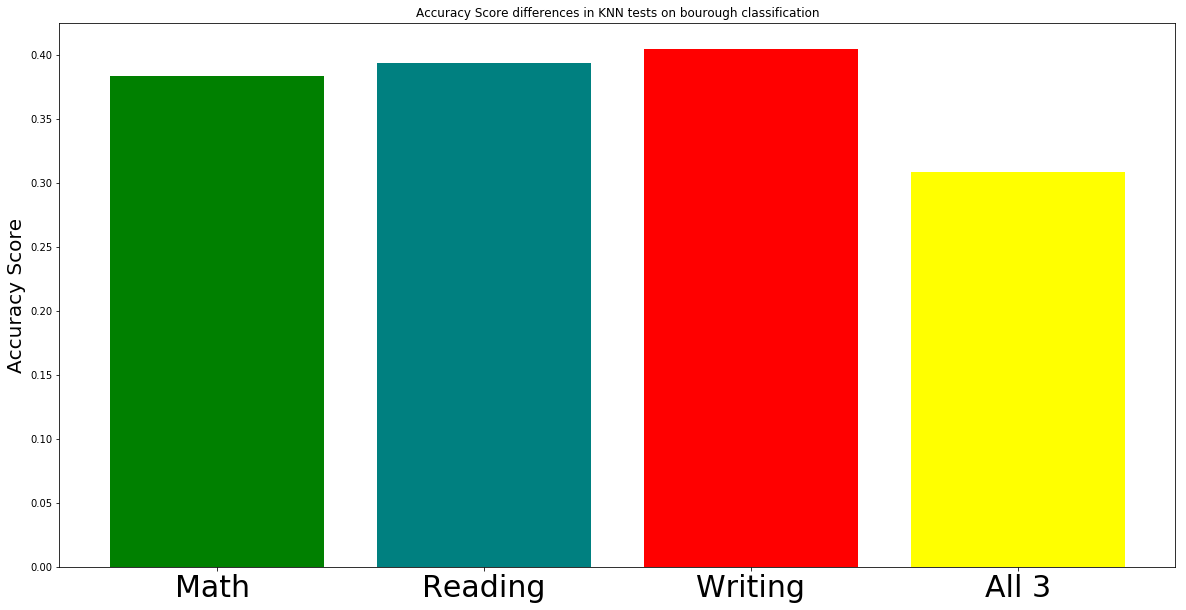

In [89]:
bar1 = mathaccuracy
bar2 = readingaccuracy 
bar3 = writingaccuracy
bar4= allaccuracy


plt.figure(figsize=(20.0,10.0))
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=30)

# Adding the two bars and assigning attributes
plt.bar([0,1,2,3],[bar1,bar2,bar3,bar4],align='center', color = ['green','teal','red','yellow'])

# Add a suitable title
plt.title('Accuracy Score differences in KNN tests on bourough classification')

# Adding suitable labels to the axes
plt.xticks([0,1,2,3],['Math ','Reading','Writing','All 3'])
plt.ylabel('Accuracy Score')

As we can see, there doesn't seem to be a meaningful difference between the accuracy scores of all 4 models and there scores seem to all be quite low (in the .3-.4 range). This suggests that SAT score isn't a great metric to predict bourough with. Another issue could be the dropped data which had no SAT score, those points could be meaningful but unfortunately we weren't able to analyze them (as a score of 0 would be very far away from any of the other data points)

# Part C: Creating a Decision Tree model based on demographics trying to predict borough

Since our SAT scores didn't do a good job at predicting bourough, we wanted to see how demographic data would do. This is also a classification problem with multiple variables, so we decided to make a Decision Tree model and see how it would perform.

In [90]:
z = []
visited = []
count = 0

for x in df['Zip Code']:
    if visited.count(x) < 1:
        z.append(x)
        count = count + 1
    visited.append(x)

print(type(z[0]))
print(count) 
valid_zips = df_Money.loc[(df_Money['zip_code'].isin(z))]

<class 'int'>
120


In [91]:
##### Arrays for zip codes of boroughs 
Man = []
Bro = []
Brx = []
Que = []
Sta = []

for (r,get) in df.iterrows():  ########## Gets zip codes of boroughs 
    if get['Borough'] == 'Manhattan':
        if (Man.count(get['Zip Code']) < 1):
            Man.append(get['Zip Code'])
    elif get['Borough'] == 'Brooklyn':
        if (Bro.count(get['Zip Code']) < 1):
            Bro.append(get['Zip Code'])
    elif get['Borough'] == 'Bronx':
        if (Brx.count(get['Zip Code']) < 1):    
            Brx.append(get['Zip Code'])
    elif get['Borough'] == 'Queens':
        if (Que.count(get['Zip Code']) < 1):    
            Que.append(get['Zip Code'])
    elif get['Borough'] == 'Staten Island':
        if (Sta.count(get['Zip Code']) < 1):
            Sta.append(get['Zip Code'])

print(Man)
print(Bro)
print(Brx)
print(Que)
print(Sta)

[10001, 10002, 10003, 10004, 10006, 10009, 10010, 10011, 10013, 10016, 10019, 10021, 10023, 10024, 10026, 10027, 10029, 10030, 10031, 10032, 10033, 10034, 10035, 10036, 10038, 10039, 10040, 10065, 10128, 10282]
[11201, 11203, 11204, 11205, 11206, 11207, 11208, 11209, 11210, 11211, 11212, 11213, 11214, 11215, 11216, 11217, 11218, 11220, 11221, 11222, 11223, 11224, 11225, 11226, 11229, 11230, 11231, 11232, 11233, 11235, 11236, 11237, 11238]
[10451, 10452, 10453, 10454, 10455, 10456, 10457, 10458, 10459, 10460, 10461, 10462, 10463, 10466, 10467, 10468, 10469, 10472, 10473, 10475]
[11101, 11102, 11103, 11106, 11354, 11355, 11358, 11361, 11364, 11365, 11366, 11367, 11368, 11373, 11375, 11385, 11411, 11412, 11413, 11416, 11417, 11418, 11419, 11420, 11423, 11426, 11427, 11432, 11433, 11434, 11691, 11694]
[10301, 10302, 10306, 10312, 10314]


In [92]:
valid_zips.head()

,UID,state_ab,city,place,zip_code,area_code,lat,lng,ALand,AWater,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
43,266018,NY,Bronx,Saddle Rock,10473,718,40.803534,-73.860661,479463,852046,...,38.74192,37.58333,22.08486,656.30040,2744.0,0.55391,0.47756,0.07647,0.01511,0.12088
44,266019,NY,Bronx,Saddle Rock,10473,718,40.808787,-73.851425,770689,690794,...,38.18586,38.58333,22.56148,689.55666,3019.0,0.72891,0.36770,0.06511,0.04549,0.05467
45,266020,NY,Bronx,Pelham Manor,10473,718,40.818848,-73.858076,485079,0,...,40.19420,39.41667,23.98019,862.98753,3321.0,0.21370,0.41696,0.08227,0.04854,0.05876
46,266022,NY,Bronx,Pelham Manor,10473,212,40.817580,-73.866096,395564,0,...,39.13367,39.33333,21.56551,1409.77020,5215.0,0.18882,0.33017,0.11586,0.04943,0.05536
47,266024,NY,Bronx,Pelham Manor,10473,212,40.815735,-73.871083,675911,263388,...,32.45833,32.41667,1.82574,7.64407,41.0,0.00000,0.00000,0.00000,0.00000,0.00000


In [93]:
def getB(row): 
    zip = row['zip_code']
    if Man.count(zip) == 1:
        return 'Manhattan'
    elif Bro.count(zip) == 1:
        return 'Brooklyn'
    elif Brx.count(zip) == 1:
        return 'Bronx'
    elif Que.count(zip) == 1:
        return 'Queens'
    elif Sta.count(zip) == 1:
        return 'Staten Island'
    
valid_zips['Borough'] = valid_zips.apply (lambda row: getB(row), axis=1)   
valid_zips = valid_zips.dropna()
valid_zips.head()

/home/timur/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,UID,state_ab,city,place,zip_code,area_code,lat,lng,ALand,AWater,...,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced,Borough
43,266018,NY,Bronx,Saddle Rock,10473,718,40.803534,-73.860661,479463,852046,...,37.58333,22.08486,656.30040,2744.0,0.55391,0.47756,0.07647,0.01511,0.12088,Bronx
44,266019,NY,Bronx,Saddle Rock,10473,718,40.808787,-73.851425,770689,690794,...,38.58333,22.56148,689.55666,3019.0,0.72891,0.36770,0.06511,0.04549,0.05467,Bronx
45,266020,NY,Bronx,Pelham Manor,10473,718,40.818848,-73.858076,485079,0,...,39.41667,23.98019,862.98753,3321.0,0.21370,0.41696,0.08227,0.04854,0.05876,Bronx
46,266022,NY,Bronx,Pelham Manor,10473,212,40.817580,-73.866096,395564,0,...,39.33333,21.56551,1409.77020,5215.0,0.18882,0.33017,0.11586,0.04943,0.05536,Bronx
48,266025,NY,Bronx,Pelham Manor,10454,718,40.807003,-73.920875,127492,0,...,27.66667,21.76094,738.45441,3017.0,0.02316,0.30591,0.07678,0.02011,0.10542,Bronx


In [94]:
X=valid_zips.drop(['UID','state_ab','city','place','zip_code','area_code','lat','lng',
                  'ALand','AWater','Borough'], axis=1)

Y=valid_zips['Borough']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=55)

best_depth = 1 #Keep track of depth that produces tree with highest accuracy
best_accuracy = 0 #The best accuracy from a given tree
for k in range(1,100):
    model=tree.DecisionTreeClassifier(max_depth=k)
    model.fit(X_train, Y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    if(accuracy_score(Y_test, pred_test)>best_accuracy):
        best_depth=k
        best_accuracy=accuracy_score(Y_test, pred_test)

print(best_accuracy)
print(best_depth)



# Creates the Decision Tree Classifier
model=tree.DecisionTreeClassifier(max_depth=66)

#TODO: train the model
model.fit(X_train,Y_train)

#TODO: Calculate the training and testing accuracy
dtree_pred_train = model.predict(X_train)
dtree_pred_test = model.predict(X_test) 
print("Train Accuracy: ", accuracy_score(Y_train, dtree_pred_train))
print("Test Accuracy: ", accuracy_score(Y_test, dtree_pred_test))

0.6097560975609756
78
Train Accuracy:  1.0
Test Accuracy:  0.5853658536585366


As we can see, the decision tree model performed better than the SAT KNN models. It gets a score of about .54 while the SAT models get scores from .3-.4. This suggests that demographics are a better tool to predict bourough than SAT. 

# Conclusion

We found that SAT score is not the greatest metric to predict bourough. In comparsion, demographics do a much better job. This isn't that suprising, considering the amount of information hidded in demographics where SAT scores only consider a certain age group, which limits it's effectiveness. The amount of data in demographic data does a good job since there is so much.